In [1]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf 

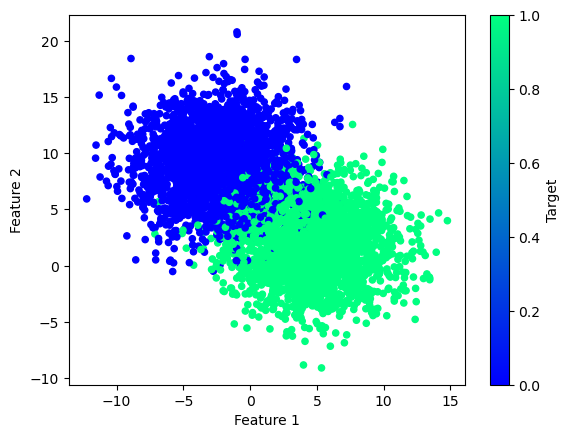

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=5000, centers=2, n_features=2, random_state=42, cluster_std=3)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")
plt.show()

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(X, y, random_state=42)


In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100


118/118 [==============================] - 19s 13ms/step - loss: 0.6249 - accuracy: 0.7309
Epoch 2/100
118/118 [==============================] - 2s 18ms/step - loss: 0.5700 - accuracy: 0.8099
Epoch 3/100
118/118 [==============================] - 3s 26ms/step - loss: 0.5122 - accuracy: 0.8533
Epoch 4/100
118/118 [==============================] - 2s 16ms/step - loss: 0.4598 - accuracy: 0.8795
Epoch 5/100
118/118 [==============================] - 2s 15ms/step - loss: 0.4156 - accuracy: 0.8965
Epoch 6/100
118/118 [==============================] - 2s 14ms/step - loss: 0.3791 - accuracy: 0.9091
Epoch 7/100
118/118 [==============================] - 2s 13ms/step - loss: 0.3482 - accuracy: 0.9208
Epoch 8/100
118/118 [==============================] - 1s 10ms/step - loss: 0.3221 - accuracy: 0.9253
Epoch 9/100
118/118 [==============================] - 2s 16ms/step - loss: 0.2997 - accuracy: 0.9304
Epoch 10/100
118/118 [==============================] - 1s 10ms/step - loss: 0.

In [11]:
# Evaluate the model using the test data

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)

40/40 - 0s - loss: 0.1234 - accuracy: 0.9528 - 343ms/epoch - 9ms/step
Loss: 0.123351089656353, Accuracy: 0.9527999758720398


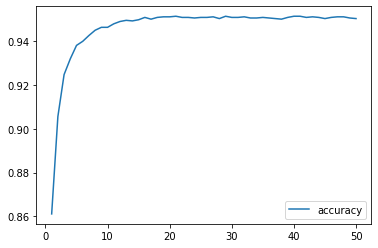

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()